In [14]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import operator
import scipy as sp
from sklearn import preprocessing
import json
import pandas as pd
from scipy.stats import gamma
from math import log2

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data_location_AT = [r"/content/drive/MyDrive/research/data/ATER",
                 r"/content/drive/MyDrive/research/data/ATERDD",
                 r"/content/drive/MyDrive/research/data/ATGEO",
                 r"/content/drive/MyDrive/research/data/ATGEOGD",
                 r"/content/drive/MyDrive/research/data/ATHGG",
                 r"/content/drive/MyDrive/research/data/ATSF",
                 r"/content/drive/MyDrive/research/data/ATSFDD",
                 r"/content/drive/MyDrive/research/data/ATSticky",
                 r"/content/drive/MyDrive/research/data/ATOriginal"]

In [17]:
num = 8
cats = num if num <= 8 else 8
X = []
y = []
for i in range(cats):
        x = pd.read_csv(data_location_AT[i], header = None, sep = ' ')
        for b in x:
            X.append(b)
            y.append(i)


# x = X
# X = normalize(X)
# x_train, x_test, y_train, y_test = train_test_split(X,y)

In [18]:
new_x = normalize(x)
new_x = pd.DataFrame(new_x)
new_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,4.700344e-07,0.000034,4.589286e-07,0.001243,0.004742,0.000005,0.000274,0.000012,8.495156e-07,0.029429,0.143405,0.985762,0.029185,0.004303,0.076652,0.000076,0.002595,0.007874,0.000367,0.001656,0.000015,0.000376,0.000190,0.000689,0.000273,0.000019,0.000096,0.000007,0.000012,0.000002
1,4.909488e-07,0.000036,4.985687e-07,0.001333,0.004945,0.000006,0.000296,0.000013,9.638711e-07,0.031128,0.154147,0.983737,0.032447,0.004637,0.079655,0.000078,0.002782,0.008607,0.000383,0.001863,0.000016,0.000408,0.000213,0.000783,0.000303,0.000022,0.000109,0.000008,0.000014,0.000002
2,3.905923e-07,0.000029,3.850254e-07,0.001065,0.004509,0.000004,0.000240,0.000010,6.673357e-07,0.024558,0.130413,0.988215,0.025894,0.003640,0.071107,0.000062,0.002262,0.007114,0.000316,0.001413,0.000013,0.000321,0.000175,0.000567,0.000237,0.000016,0.000080,0.000006,0.000010,0.000001
3,4.805243e-07,0.000035,4.824014e-07,0.001284,0.004866,0.000005,0.000289,0.000013,9.361979e-07,0.029860,0.148292,0.984761,0.031009,0.004456,0.079211,0.000076,0.002673,0.008503,0.000380,0.001765,0.000016,0.000392,0.000215,0.000757,0.000294,0.000021,0.000107,0.000007,0.000013,0.000002
4,4.844209e-07,0.000035,4.702516e-07,0.001297,0.004879,0.000006,0.000283,0.000012,8.357116e-07,0.030390,0.150702,0.984482,0.030693,0.004454,0.078062,0.000077,0.002749,0.008261,0.000375,0.001719,0.000016,0.000394,0.000210,0.000689,0.000286,0.000020,0.000098,0.000007,0.000012,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,4.922474e-07,0.000036,5.008251e-07,0.001358,0.004990,0.000006,0.000301,0.000014,9.283725e-07,0.032122,0.156739,0.983139,0.033161,0.004745,0.081214,0.000083,0.002890,0.008969,0.000401,0.001890,0.000017,0.000423,0.000234,0.000764,0.000316,0.000022,0.000111,0.000008,0.000014,0.000002
495,5.120203e-07,0.000037,5.082396e-07,0.001373,0.004984,0.000006,0.000301,0.000013,9.289764e-07,0.032559,0.156281,0.983266,0.032524,0.004785,0.080670,0.000084,0.002938,0.008732,0.000399,0.001870,0.000018,0.000428,0.000222,0.000753,0.000309,0.000022,0.000108,0.000008,0.000014,0.000002
496,4.331507e-07,0.000032,4.399669e-07,0.001190,0.004717,0.000005,0.000272,0.000012,8.285872e-07,0.027549,0.141699,0.985962,0.029335,0.004141,0.077873,0.000070,0.002519,0.008171,0.000371,0.001636,0.000015,0.000364,0.000209,0.000689,0.000278,0.000019,0.000098,0.000007,0.000012,0.000002
497,5.204771e-07,0.000037,5.164893e-07,0.001388,0.005081,0.000006,0.000306,0.000014,9.604416e-07,0.032276,0.159596,0.982674,0.033369,0.004813,0.081134,0.000080,0.002882,0.008914,0.000399,0.001895,0.000017,0.000420,0.000229,0.000781,0.000313,0.000022,0.000111,0.000008,0.000014,0.000002


In [19]:
#euclidean distance formula
def euclid(origin, other):
  return np.sum((origin - other) ** 2)**(1/2)

#find euclidean distances between all points and return it as an array
#takes a row and finds euclidean distance between this row and every other row in the dataframe
#(skips itself; if distance with itself will be 0)
def find_distances(df_vals):
  euclid_list = []
  for reference_row in df_vals:
    reference_dists = []
    for other_row in df_vals:
      euclid_dist = euclid(reference_row, other_row)
      if euclid_dist == 0:
        continue
      else:
        reference_dists.append(euclid_dist)
    euclid_list.append(reference_dists)
  return euclid_list

In [20]:
#given array of arrays, find smallest value for each array
def smallest_in_arr(euclid_list):
  small_arr = []
  smallest = 99;
  for array in euclid_list:
    small_arr.append(min(array))
  return small_arr

In [21]:
df_vals = new_x.values
euclid_dists = find_distances(df_vals)
euclid_dists = np.asarray(euclid_dists)
euclid_dists.shape

(499, 498)

In [22]:
near_neigh = np.asarray(smallest_in_arr(euclid_dists))

In [23]:
shape = 4.280250324682926

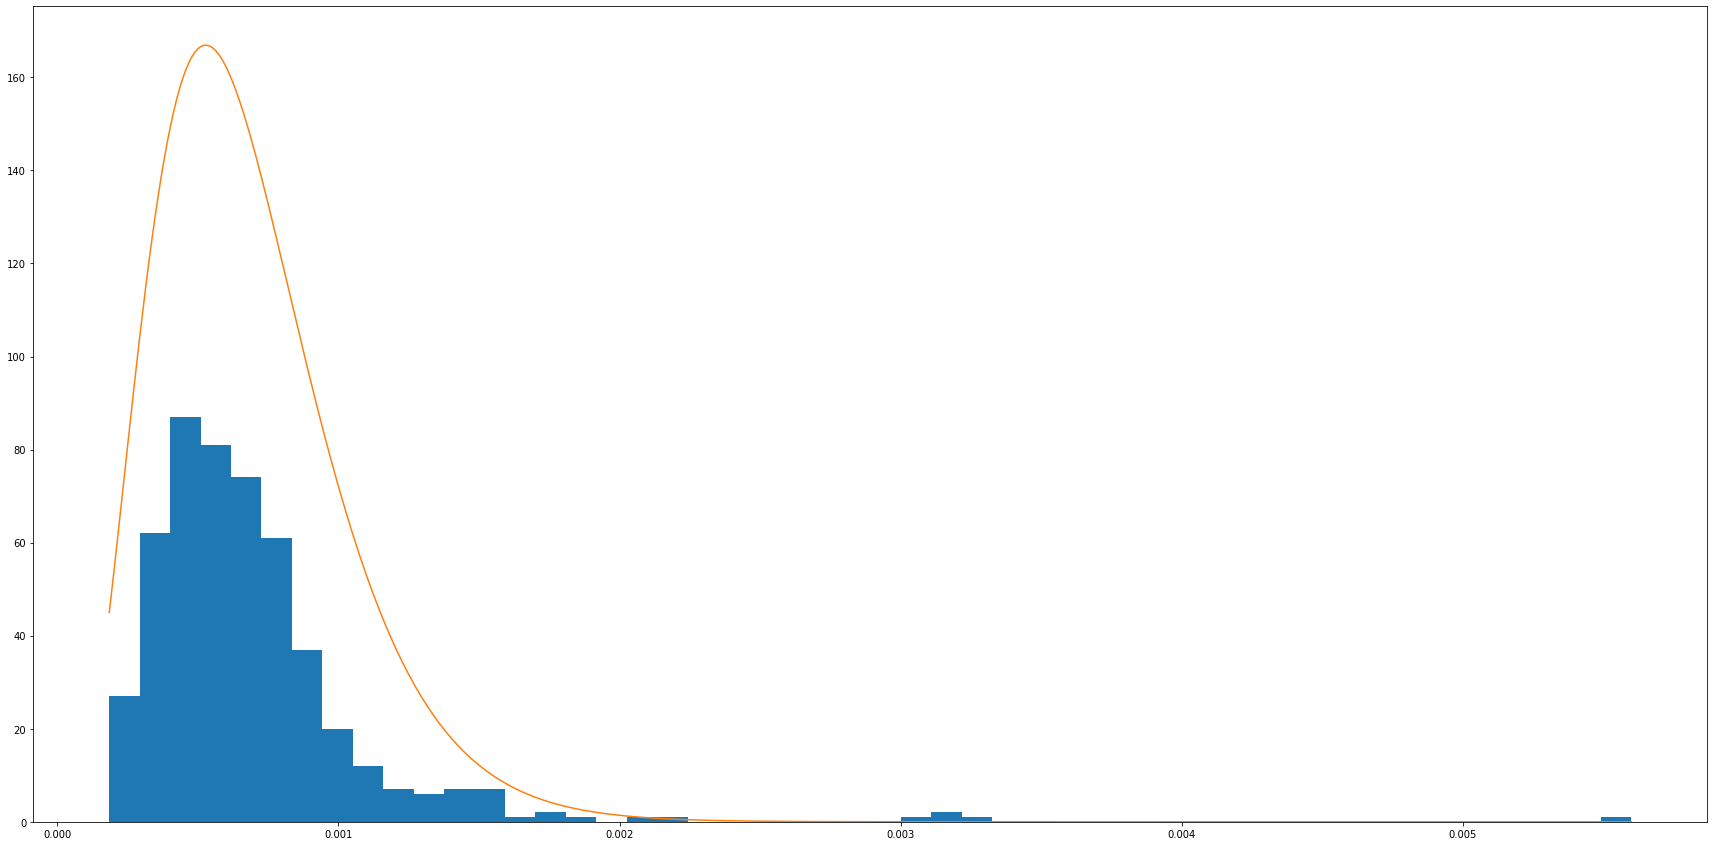

In [24]:
x = np.linspace(near_neigh.min(), near_neigh.max(), 499)
fig, ax = plt.subplots(1,1, figsize = (30,15))
ax.hist(near_neigh, bins = 50)
shape, loc, scale = gamma.fit(near_neigh, floc = 0)
y = gamma.pdf(x, shape, loc, scale)/8
ax.plot(x,y)
plt.show()

In [25]:
scale

0.00016081640684647208